In [23]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2
#allows to print the dataframe nicely
from IPython.core import display as ICD

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [24]:
# import additional packages to insepct data and clean them
import pandas as pd
import os 
import random 
from zipfile import ZipFile
import datetime

In [165]:
# import helping functions from the implementation file
#from proj1_helpers import load_csv_data
from proj1_helpers import *
from implementations import *
import seaborn as sns

# Code Outline

### Data Inspection and preparation 
In the first section the features provided were cleaned and studied; then, on the base of the scientific knowledge behind the Boson data and on the base of the features data, a method to select features was prepared. 

### Feature Generation
Before actually applying regression algorithms different feature spaces were generated; in this manner the performance results obtained with the different features could be compared in the testing phase and an evaluation of the most important features could be done.

### Testing
Hence the performance of a selection of regression models was compared with different features in order to obtain the best combination according to the prediction results obtained in the Kaggle competition

## Data Inspection and Preparation

In [26]:
# import zipped files from the github repository
data_folder='./data/'
zip_file = ZipFile(data_folder+'all.zip')
# zip file creates a list of files with certain properties
zip_file.infolist()

[<ZipInfo filename='train.csv' compress_type=deflate file_size=48103379 compress_size=17670847>,
 <ZipInfo filename='test.csv' compress_type=deflate file_size=109335584 compress_size=40089137>,
 <ZipInfo filename='sample-submission.csv' compress_type=deflate file_size=5682394 compress_size=1263762>]

Loading the training set and the testing set and creating dataframes to inspect the data.

In [27]:
# now we want to access the 'filename' property in the zipfile variable
# and we create a dictionary of dataframe
dfs = {text_file.filename: pd.read_csv(zip_file.open(text_file.filename))
       for text_file in zip_file.infolist()
       if text_file.filename.endswith('.csv')}
df_train=dfs['train.csv']
df_test=dfs['test.csv']
df_sample_submission=dfs['sample-submission.csv']

The first step was understanding the data structure and learning about the features we have been provided with. By studying the scientific backgroun about the experiment in the [competition description](https://higgsml.lal.in2p3.fr/files/2014/04/documentation_v1.8.pdf), the relationship between the features was understood. 

In [28]:
df_train.head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
0,100000,s,138.470,51.655,97.827,27.980,0.91,124.711,2.666,3.064,...,-0.277,258.733,2,67.435,2.150,0.444,46.062,1.24,-2.475,113.497
1,100001,b,160.937,68.768,103.235,48.146,-999.00,-999.000,-999.000,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.000,-999.00,-999.000,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.00,-999.000,-999.000,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.000,-999.00,-999.000,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.00,-999.000,-999.000,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.00,-999.000,-999.000,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.000,-999.00,-999.000,0.000


The first steps was taking care of the fact that certain datapoints could sometime take values not in the range of normal values. This happeneded when a data point had a value of -999.0.

In [29]:
# example of the part of the dataset where a column would get a value not in the normal range of values
df_train[df_train['DER_lep_eta_centrality']==-999.0].head()

,Id,Prediction,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
1,100001,b,160.937,68.768,103.235,48.146,-999.0,-999.0,-999.0,3.473,...,-1.916,164.546,1,46.226,0.725,1.158,-999.0,-999.0,-999.0,46.226
2,100002,b,-999.000,162.172,125.953,35.635,-999.0,-999.0,-999.0,3.148,...,-2.186,260.414,1,44.251,2.053,-2.028,-999.0,-999.0,-999.0,44.251
3,100003,b,143.905,81.417,80.943,0.414,-999.0,-999.0,-999.0,3.310,...,0.060,86.062,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,0.000
4,100004,b,175.864,16.915,134.805,16.405,-999.0,-999.0,-999.0,3.891,...,-0.871,53.131,0,-999.000,-999.000,-999.000,-999.0,-999.0,-999.0,0.000
7,100007,s,154.916,10.418,94.714,29.169,-999.0,-999.0,-999.0,2.897,...,-1.761,187.299,1,30.638,-0.715,-1.724,-999.0,-999.0,-999.0,30.638


It was soon discovered that almost half of the datapoints were getting values not in the range of normal values for each features. Discarting all these data was not an option hence an alternative solution was proposed.

In [30]:
# example of number of data points to be deleted considering the feature 'DER_lep_eta_centrality' only
df_train[df_train['DER_lep_eta_centrality']==-999.0].shape[0]

177457

A relationship between the values attained by each feature was present: in fact it was found that the value obtained by 'PRI_jet_num', the number of jets during the collision, was directly influencing the values of a big group of other features. In particular any time its value would be smaller or equal to one, a group of features would automatically get values out of the normal range. 

In [31]:
# example of relationship between 'PRI_jet_num' and 'DER_lep_eta_centrality'
df_train.index[df_train['DER_lep_eta_centrality']==-999.0]
df_train.index[df_train['PRI_jet_num']<=1]

# checking that the indices at which -999.0 values were obtained were also the same in which 'PRI_jet_num' was less\
# or equal to 1
if df_train.index[df_train['PRI_jet_num']<=1].all()==df_train.index[df_train['DER_lep_eta_centrality']==-999.0].all():
    print ('When PRI_jet_num is less or equal to 1, DER_lep_eta_centrality gets values out of range')

When PRI_jet_num is less or equal to 1, DER_lep_eta_centrality gets values out of range


It was then found that the value of 'PRI_jet_num' would automatically influenc the values of the following features: 'DER_deltaeta_jet_jet','DER_mass_jet_jet', 'DER_prodeta_jet_jet','DER_lep_eta_centrality', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta','PRI_jet_leading_phi', 'PRI_jet_subleading_pt', 'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi'. Hence the dataset was divided in two smaller dataset. One containing the features depending directly on 'PRI_jet_num' and another with those not directly dependent on 'PRI_jet_num'.

In [147]:
# defining the independent features
df_features_train_independent=df_train[['Id','DER_mass_MMC','DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 
                              'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality', 'PRI_tau_pt', 
                              'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 
                               'PRI_met_sumet','PRI_jet_num', 'PRI_jet_all_pt' ]]

# defining the dependent features
df_features_train_independent['PRI_jet_num']=df_features_train_independent['PRI_jet_num'].astype('float')

# defining the dataframe of predictions
prediction=df_train[['Id','Prediction']]

ICD.display(df_train.columns.values)

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


array(['Id', 'Prediction', 'DER_mass_MMC', 'DER_mass_transverse_met_lep',
       'DER_mass_vis', 'DER_pt_h', 'DER_deltaeta_jet_jet',
       'DER_mass_jet_jet', 'DER_prodeta_jet_jet', 'DER_deltar_tau_lep',
       'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau',
       'DER_met_phi_centrality', 'DER_lep_eta_centrality', 'PRI_tau_pt',
       'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta',
       'PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 'PRI_met_sumet',
       'PRI_jet_num', 'PRI_jet_leading_pt', 'PRI_jet_leading_eta',
       'PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
       'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi',
       'PRI_jet_all_pt'], dtype=object)

Investigating if there is linear relationship between the parameters of the table by calculating the Pearson Correlation Moment Coefficient

In [164]:
df_train.corr()

,Id,DER_mass_MMC,DER_mass_transverse_met_lep,DER_mass_vis,DER_pt_h,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_deltar_tau_lep,DER_pt_tot,...,PRI_met_phi,PRI_met_sumet,PRI_jet_num,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_all_pt
Id,1.000000,0.001917,-0.006059,-0.001851,0.002073,-0.000060,0.000353,-0.000075,-0.001349,-0.000581,...,-0.001141,0.002312,0.000175,0.001396,0.001216,0.001214,-0.000065,-0.000068,-0.000060,0.001024
DER_mass_MMC,0.001917,1.000000,-0.455755,0.168548,0.198765,0.162661,0.160524,0.162521,0.228105,0.045826,...,0.007411,0.221984,0.221078,0.250158,0.247083,0.247078,0.162836,0.162614,0.162609,0.185372
DER_mass_transverse_met_lep,-0.006059,-0.455755,1.000000,0.190109,-0.249116,-0.176386,-0.190392,-0.175942,0.043251,0.017758,...,-0.015925,-0.167811,-0.210537,-0.229674,-0.220370,-0.220355,-0.176837,-0.176231,-0.176225,-0.210009
DER_mass_vis,-0.001851,0.168548,0.190109,1.000000,-0.062562,-0.032251,-0.040620,-0.032126,0.579712,-0.000702,...,-0.001467,0.053300,-0.026860,-0.019151,-0.013749,-0.013742,-0.033188,-0.032202,-0.032206,-0.052902
DER_pt_h,0.002073,0.198765,-0.249116,-0.062562,1.000000,0.523664,0.534531,0.523639,-0.539379,0.310501,...,0.008585,0.782547,0.623401,0.621599,0.564898,0.564894,0.531647,0.523714,0.523703,0.808616
DER_deltaeta_jet_jet,-0.000060,0.162661,-0.176386,-0.032251,0.523664,1.000000,0.946045,0.999981,-0.299076,0.270878,...,0.005245,0.619100,0.867521,0.545027,0.521657,0.521664,0.999346,0.999995,0.999996,0.712446
DER_mass_jet_jet,0.000353,0.160524,-0.190392,-0.040620,0.534531,0.946045,1.000000,0.944443,-0.303751,0.247771,...,0.005167,0.617057,0.814191,0.521645,0.493233,0.493241,0.947652,0.945505,0.945507,0.719962
DER_prodeta_jet_jet,-0.000075,0.162521,-0.175942,-0.032126,0.523639,0.999981,0.944443,1.000000,-0.299083,0.271435,...,0.005254,0.619388,0.867741,0.545022,0.521653,0.521661,0.999347,0.999988,0.999989,0.712620
DER_deltar_tau_lep,-0.001349,0.228105,0.043251,0.579712,-0.539379,-0.299076,-0.303751,-0.299083,1.000000,-0.148081,...,-0.001570,-0.407002,-0.347904,-0.335851,-0.304161,-0.304145,-0.303416,-0.299107,-0.299101,-0.448737
DER_pt_tot,-0.000581,0.045826,0.017758,-0.000702,0.310501,0.270878,0.247771,0.271435,-0.148081,1.000000,...,0.002515,0.448925,0.360409,0.202920,0.186564,0.186590,0.279203,0.271100,0.271091,0.403382


In [148]:
for column_name in df_features_train_independent.columns.values:
    
    index_to_drop=df_features_train_independent.index[np.abs(df_features_train_independent[column_name]-df_features_train_independent[column_name].mean()) >= (3*df_features_train_independent[column_name].std())]
    df_features_train_independent=df_features_train_independent.drop(index_to_drop)
    prediction=prediction.drop(index_to_drop)
    prediction_independent=prediction
ICD.display(len(df_features_train_independent.iloc[:,1:]))
ICD.display(len(prediction_independent))

212034

212034

Divide the independent features in primitive and derivates

In [149]:
df_features_train_independent_pri=df_features_train_independent[['PRI_tau_pt', 
                              'PRI_tau_eta', 'PRI_tau_phi', 'PRI_lep_pt', 'PRI_lep_eta','PRI_lep_phi', 'PRI_met', 'PRI_met_phi', 
                               'PRI_met_sumet','PRI_jet_num', 'PRI_jet_all_pt' ]]
df_features_train_independent_der=df_features_train_independent[['DER_mass_MMC','DER_mass_transverse_met_lep', 'DER_mass_vis', 'DER_pt_h', 'DER_deltar_tau_lep', 
                              'DER_pt_tot', 'DER_sum_pt', 'DER_pt_ratio_lep_tau', 'DER_met_phi_centrality']]

In [150]:
# defining the dependent features

df_features_train_dependent=df_train[['Id','DER_deltaeta_jet_jet','DER_mass_jet_jet', 'DER_prodeta_jet_jet','DER_lep_eta_centrality',
                             'PRI_jet_leading_pt', 'PRI_jet_leading_eta','PRI_jet_leading_phi', 'PRI_jet_subleading_pt',
                             'PRI_jet_subleading_eta', 'PRI_jet_subleading_phi','PRI_jet_num']]

df_features_train_dependent['PRI_jet_num']=df_features_train_dependent['PRI_jet_num'].astype('float')

# defining the dataframe of predictions
prediction=df_train[['Id','Prediction']]

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


Investigating if there is linear relationship between the parameters of the table by calculating the Pearson Correlation Moment Coefficient

In [116]:
df_features_train_dependent.corr()

,Id,DER_deltaeta_jet_jet,DER_mass_jet_jet,DER_prodeta_jet_jet,DER_lep_eta_centrality,PRI_jet_leading_pt,PRI_jet_leading_eta,PRI_jet_leading_phi,PRI_jet_subleading_pt,PRI_jet_subleading_eta,PRI_jet_subleading_phi,PRI_jet_num
Id,1.000000,0.004562,0.005707,-0.006466,0.003051,0.001675,0.007517,0.004471,0.003225,-0.001271,0.004925,-0.002623
DER_deltaeta_jet_jet,0.004562,1.000000,0.841164,-0.822574,0.634263,-0.032689,-0.000154,-0.001788,-0.073879,-0.007741,-0.001020,-0.157146
DER_mass_jet_jet,0.005707,0.841164,1.000000,-0.774309,0.512208,0.271330,0.004177,-0.000298,0.223713,-0.009570,-0.004760,-0.070125
DER_prodeta_jet_jet,-0.006466,-0.822574,-0.774309,1.000000,-0.549993,-0.024137,-0.006769,-0.001669,0.000256,0.000087,0.005435,0.113160
DER_lep_eta_centrality,0.003051,0.634263,0.512208,-0.549993,1.000000,0.014979,0.001261,-0.001154,-0.001657,0.000485,-0.001410,-0.117713
PRI_jet_leading_pt,0.001675,-0.032689,0.271330,-0.024137,0.014979,1.000000,0.001745,0.003076,0.483041,-0.001223,-0.003736,0.147986
PRI_jet_leading_eta,0.007517,-0.000154,0.004177,-0.006769,0.001261,0.001745,1.000000,-0.010129,-0.001972,-0.195097,0.001362,-0.003058
PRI_jet_leading_phi,0.004471,-0.001788,-0.000298,-0.001669,-0.001154,0.003076,-0.010129,1.000000,0.002691,0.001085,-0.054180,0.002854
PRI_jet_subleading_pt,0.003225,-0.073879,0.223713,0.000256,-0.001657,0.483041,-0.001972,0.002691,1.000000,0.001944,-0.013280,0.292054
PRI_jet_subleading_eta,-0.001271,-0.007741,-0.009570,0.000087,0.000485,-0.001223,-0.195097,0.001085,0.001944,1.000000,0.001714,0.002621


In [151]:
for column_name in df_features_train_dependent.columns.values:
    
    index_to_drop_invalid=df_features_train_dependent.index[df_features_train_dependent['PRI_jet_num']<=1]
    df_features_train_dependent=df_features_train_dependent.drop(index_to_drop_invalid)
    prediction=prediction.drop(index_to_drop_invalid)
    prediction_dependent=prediction
    
    index_to_drop=df_features_train_dependent.index[np.abs(df_features_train_dependent[column_name]-df_features_train_dependent[column_name].mean()) >= (3*df_features_train_dependent[column_name].std())]
    df_features_train_dependent=df_features_train_dependent.drop(index_to_drop)
    prediction=prediction.drop(index_to_drop)
    prediction_dependent=prediction
    
ICD.display(len(df_features_train_dependent.iloc[:,1:]))
ICD.display(len(prediction_dependent))

67389

67389

variables prefixed with PRI (for PRImitives) are “raw” quantities about the bunch collision as measured by the detector.
variables prefixed with DER (for DERived) are quantities computed from the primitive features, which were selected by  the physicists of ATLAS
it can happen that for some entries some variables are meaningless or cannot be computed; in this case, their value is −999.0, which is outside the normal range of all variables

Training set, Validation set and Test set.

PCA analysis

Text(0,0.5,'Density')

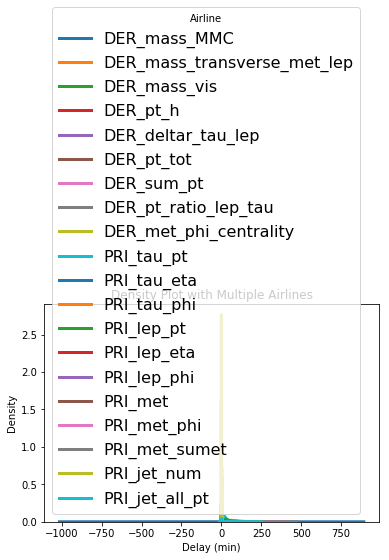

In [168]:
colors = {'b': 'rgb(31, 119, 180)', 
          's': 'rgb(255, 127, 14)'}
features = df_features_train_independent.iloc[:,1:].columns.values

# Iterate through the five airlines

for feature in features:
    
    # Subset for boson and not boson
    subset_boson = df_features_train_independent[prediction_independent['Prediction'] == 'b']
    
    subset_non_boson = df_features_train_independent[prediction_independent['Prediction'] == 's']
    
    # Draw the density plot
    sns.distplot(subset_boson[feature], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = feature)
    
# Plot formatting
plt.legend(prop={'size': 16}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')

# Test solving

Outliers deletion for independent set and prediction set in order not to mix rows once the outliers are deleted

Setting the arrays for dependent and independent variables

In [152]:
# remove the indices from the dataframes and set up the dataframes for independent variable
yb_independent, input_data_independent, ids_independent=np.array(prediction_independent['Prediction']), np.array(df_features_train_independent.iloc[:,1:]), np.array(df_features_train_independent['Id'])

In [153]:
# remove the indices from the dataframes and set up the dataframes for dependent variable
yb_dependent, input_data_dependent, ids_dependent=np.array(prediction_dependent['Prediction']), np.array(df_features_train_dependent.iloc[:,1:]), np.array(df_features_train_dependent['Id'])

In [124]:
# remove the indices from the dataframes and set up the dataframes for primitive variable
yb_independent_pri, input_data_independent_pri, ids_dependent_pri=np.array(prediction_independent['Prediction']), np.array(df_features_train_independent_pri.iloc[:,1:]), np.array(df_features_train_independent['Id'])

In [125]:
# remove the indices from the dataframes and set up the dataframes for primitive variable
yb_independent_der, input_data_independent_der, ids_dependent_der=np.array(prediction_independent['Prediction']), np.array(df_features_train_independent_der.iloc[:,1:]), np.array(df_features_train_independent['Id'])

In [154]:
# transform yb into numerical values
yb_independent[np.where(yb_independent=='b')] = -1.
yb_independent[np.where(yb_independent=='s')] = 1.
yb_independent=yb_independent.astype('float')

yb_independent_pri[np.where(yb_independent_pri=='b')] = -1.
yb_independent_pri[np.where(yb_independent_pri=='s')] = 1.
yb_independent_pri=yb_independent_pri.astype('float')

yb_independent_der[np.where(yb_independent_der=='b')] = -1.
yb_independent_der[np.where(yb_independent_der=='s')] = 1.
yb_independent_der=yb_independent_der.astype('float')

yb_dependent[np.where(yb_dependent=='b')] = -1.
yb_dependent[np.where(yb_dependent=='s')] = 1.
yb_dependent=yb_dependent.astype('float')


#Cut dataframe for fast testing
# lines_cut=200000
# tx=input_data[:lines_cut]
# y=yb[:lines_cut]
# y.shape


y_independent=yb_independent
y_dependent=yb_dependent
y_independent_pri=yb_independent_pri
y_independent_der=yb_independent_der
tx_independent=input_data_independent
tx_dependent=input_data_dependent
tx_independent_pri=input_data_independent_pri
tx_independent_der=input_data_independent_der

#input_data.shape

/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:6: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:7: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:10: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
/Users/gianlucamancini/anaconda3/lib/python3.6/site-packages/ipykernel/__main__.py:11: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison


## Stochastic gradient descent 

In [ ]:
# Define the parameters of the algorithm.
max_iters = 30
gamma = 0.1
batch_size = 2000

# Initialization
w_initial = np.zeros(tx.shape[1])

# Start SGD.
start_time = datetime.datetime.now()
sgd_losses, sgd_ws = stochastic_gradient_descent(y, tx, w_initial, batch_size, max_iters, gamma)
end_time = datetime.datetime.now()

# Print result
exection_time = (end_time - start_time).total_seconds()
print("SGD: execution time={t:.3f} seconds".format(t=exection_time))

## Least Squares

In [155]:
w_independent=least_squares(y_independent,tx_independent)
loss_independent=compute_mse(y_independent, tx_independent, w_independent)
print('Weigths: ',w_independent,"\n\n",'RMSE: ',np.sqrt(2*loss_independent))

Weigths:  [ 1.77344302e-04 -9.76874622e-03 -3.74347789e-03 -1.79152344e-03
  1.44794397e-01 -2.77351487e-03 -1.74325514e+00 -5.08625645e-01
  1.01073921e-01  1.74493880e+00 -1.12238830e-03 -1.45555473e-03
  1.76234397e+00  5.52511799e-04  2.22997508e-04  4.15931708e-03
  2.79861046e-05 -5.75654939e-04 -6.05358458e-02  1.74490081e+00] 

 RMSE:  0.8237582773290603


In [127]:
w_independent_pri=least_squares(y_independent_pri,tx_independent_pri)
loss_independent_pri=compute_mse(y_independent_pri, tx_independent_pri, w_independent_pri)
print('Weigths: ',w_independent_pri,"\n\n",'RMSE: ',np.sqrt(2*loss_independent_pri))

Weigths:  [-0.00231313 -0.00268096 -0.00772906  0.00139263  0.00090863 -0.00856707
  0.00283279  0.00110978 -0.177314    0.00546889] 

 RMSE:  0.9122897073769244


In [128]:
w_independent_der=least_squares(y_independent_der,tx_independent_der)
loss_independent_der=compute_mse(y_independent_der, tx_independent_der, w_independent_der)
print('Weigths: ',w_independent_der,"\n\n",'RMSE: ',np.sqrt(2*loss_independent_der))

Weigths:  [-8.56431915e-03  9.11847475e-04 -1.21194634e-05  1.09103174e-01
 -3.80511690e-03  1.57573761e-03 -2.57832485e-01  8.59247565e-02] 

 RMSE:  0.8362679158334438


In [156]:
w_dependent=least_squares(y_dependent,tx_dependent)
loss_dependent=compute_mse(y_dependent, tx_dependent, w_dependent)
print('Weigths: ',w_dependent,"\n\n",'RMSE: ',np.sqrt(2*loss_dependent))

Weigths:  [-2.62553709e-03  7.53728577e-04  3.81635024e-03  4.42530934e-01
  3.31633862e-04  2.66332632e-03  5.01149377e-04  2.49135001e-04
  1.85232732e-03 -3.81656559e-03 -2.65004507e-01] 

 RMSE:  0.9197140413917396


## Cross Validation

### Ridge regression

-0.016177164951547248
0.8238449290743994


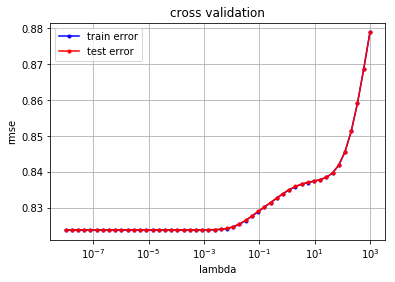

In [50]:
# Define the parameters of the algorithm.
seed = 1
k_fold = 8
lambdas = np.logspace(-8, 3, 50)

# Initialization
k_indices=build_k_indices(y, k_fold, seed)
cross_rmse_train=[]
cross_rmse_test=[]
wsi_train_avg=[]
for lambda_ in lambdas:
    rmse_tr = []
    rmse_te = []
    wsi_train_lst=[]
    for k in range(k_fold):
        loss_tr, loss_te,wsi_train=cross_validation_ridge(y, tx, k_indices, k, lambda_)
        rmse_tr.append(loss_tr)
        rmse_te.append(loss_te)
        wsi_train_lst.append(wsi_train)
    cross_rmse_train.append(np.mean(rmse_tr))
    cross_rmse_test.append(np.mean(rmse_te))
    wsi_train_avg.append(np.mean(wsi_train))
cross_validation_visualization(lambdas, cross_rmse_train, cross_rmse_test)    
print(wsi_train_avg[np.argmin(cross_rmse_test)])
print(np.min(cross_rmse_test))

### Least squares

Cross validation for both the dependent and the independent set and merging of weights

In [159]:
# Define the parameters of the algorithm.
seed = 1
k_fold = 8

# Initialization
k_indices=build_k_indices(y_independent, k_fold, seed)

cross_rmse_train=[]
cross_rmse_test=[]
wsi_train_lst=[]

for k in range(k_fold):
    loss_tr, loss_te,wsi_train=cross_validation_least_squares(y_independent, tx_independent, k_indices, k)
    cross_rmse_train.append(loss_tr)
    cross_rmse_test.append(loss_te)
    wsi_train_lst.append(wsi_train)
cross_rmse_train=np.average(cross_rmse_train)
cross_rmse_test=np.average(cross_rmse_test)
wsi_train_lst=np.average(wsi_train_lst,axis=0)
w_independent=wsi_train_lst
print(wsi_train_lst)
print(cross_rmse_test)

[ 1.77351933e-04 -9.76864238e-03 -3.74367164e-03 -1.79172700e-03
  1.44804206e-01 -2.77353996e-03 -1.74351063e+00 -5.08660648e-01
  1.01073828e-01  1.74519348e+00 -1.12313138e-03 -1.45474801e-03
  1.76260112e+00  5.55104688e-04  2.20549741e-04  4.15938880e-03
  2.87752402e-05 -5.75683638e-04 -6.05301236e-02  1.74515628e+00]
0.8238487308564453


In [160]:
# Define the parameters of the algorithm.
seed = 1
k_fold = 8

# Initialization
k_indices=build_k_indices(y_dependent, k_fold, seed)

cross_rmse_train=[]
cross_rmse_test=[]
wsi_train_lst=[]

for k in range(k_fold):
    loss_tr, loss_te,wsi_train=cross_validation_least_squares(y_dependent, tx_dependent, k_indices, k)
    cross_rmse_train.append(loss_tr)
    cross_rmse_test.append(loss_te)
    wsi_train_lst.append(wsi_train)
cross_rmse_train=np.average(cross_rmse_train)
cross_rmse_test=np.average(cross_rmse_test)
wsi_train_lst=np.average(wsi_train_lst,axis=0)
w_dependent=wsi_train_lst
print(wsi_train_lst)
print(cross_rmse_test)

[-2.65998786e-03  7.53517630e-04  3.78821449e-03  4.42666406e-01
  3.32166843e-04  2.68653192e-03  4.91414549e-04  2.50826589e-04
  1.86958172e-03 -3.82554566e-03 -2.65037854e-01]
0.9198566807625578


In [161]:
# combining the weights given by the two set of dataframes
w=pd.Series(np.ones((df_test.shape[1]-2)))
total_features=pd.Series(df_train.iloc[:,2:].columns.values)
independent_features=pd.Series(df_features_train_independent.iloc[:,1:].columns.values)
dependent_features=pd.Series(df_features_train_dependent.iloc[:,1:].columns.values)

w[total_features.index[total_features.isin(independent_features)]]=w_independent
w[total_features.index[total_features.isin(dependent_features)]]=w_dependent
w

0     0.000177
1    -0.009769
2    -0.003744
3    -0.001792
4    -0.002660
5     0.000754
6     0.003788
7     0.144804
8    -0.002774
9    -1.743511
10   -0.508661
11    0.101074
12    0.442666
13    1.745193
14   -0.001123
15   -0.001455
16    1.762601
17    0.000555
18    0.000221
19    0.004159
20    0.000029
21   -0.000576
22    0.000332
23    0.002687
24    0.000491
25    0.000251
26    0.001870
27   -0.003826
28   -0.265038
29    1.745156
dtype: float64

In [162]:
tx_test=df_test.iloc[:,2:]
y_pred=predict_labels(w,np.array(tx_test))
create_csv_submission(df_test['Id'], y_pred, 'trial2')

# Other stuff
Build Polynomial